C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_19016\993929343.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['time'] // 6
C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_19016\993929343.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['time'] // 6
C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_19016\993929343.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

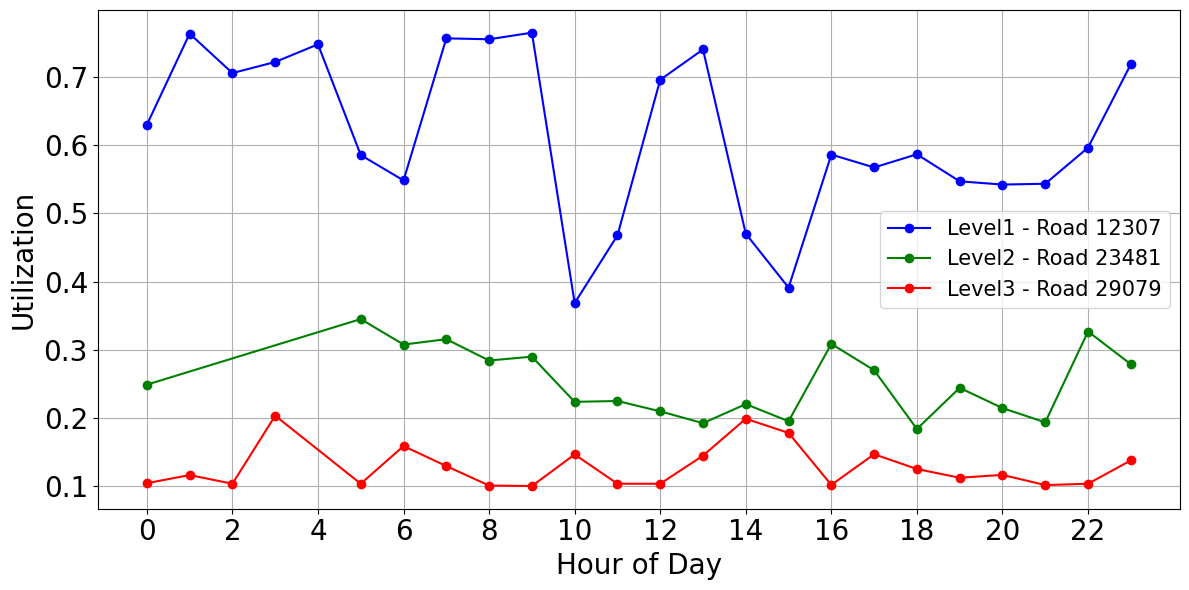

C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_19016\993929343.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['time'] // 6
C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_19016\993929343.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['time'] // 6
C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_19016\993929343.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

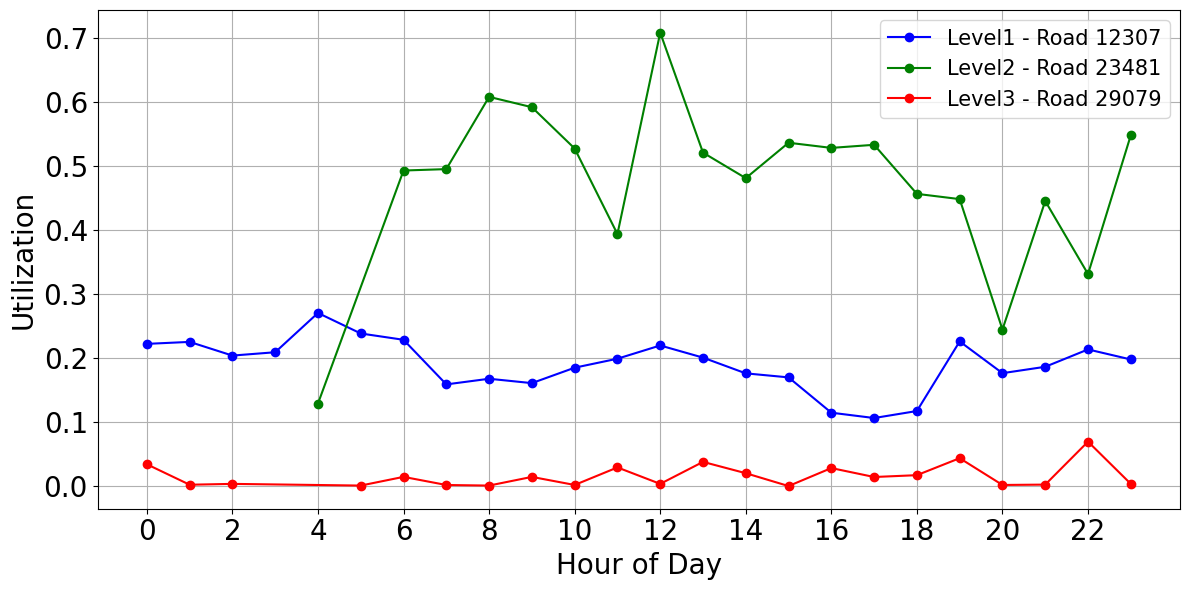

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class RoadUtilizationPlotter:
    def __init__(self, data_dir, selected_road_id, font_size=20):
        """
        Initialize the plotter with necessary parameters.
        :param data_dir: Directory containing the CSV files.
        :param selected_road_id: Dictionary mapping road levels to selected road IDs.
        :param font_size: Font size for axis labels and ticks.
        """
        self.data_dir = data_dir
        self.selected_road_id = selected_road_id
        self.font_size = font_size
        # Define color mapping for road levels
        self.level_colors = {'level1': 'blue', 'level2': 'green', 'level3': 'red'}

    def load_data(self, level, day_type):
        """
        Load data for a specific road level and day type.
        :param level: Road level (e.g., 'level1', 'level2').
        :param day_type: Day type ('workday' or 'holiday').
        :return: DataFrame containing the loaded data.
        """
        file_path = f'{self.data_dir}{level}_road_history_{day_type}_utilization_tune_AHP.csv'
        return pd.read_csv(file_path)

    def filter_and_aggregate_data(self, data, road_ids):
        """
        Filter data for selected road IDs and aggregate hourly utilization.
        :param data: DataFrame containing road data.
        :param road_ids: List of selected road IDs.
        :return: Aggregated hourly utilization DataFrame.
        """
        filtered_data = data[data['road_id'].isin(road_ids)]
        # Group data into hourly bins (time is in 10-minute slots)
        filtered_data['hour'] = filtered_data['time'] // 6
        hourly_data = filtered_data.groupby('hour')['utilization'].mean().reset_index()
        return hourly_data

    def plot_combined_utilization(self, aggregated_data, day_type):
        """
        Plot combined utilization over 24 hours for all selected roads.
        :param aggregated_data: Aggregated hourly utilization DataFrame.
        :param day_type: Day type ('workday' or 'holiday').
        """
        plt.figure(figsize=(12, 6))
        for level, road_id in self.selected_road_id.items():
            subset = aggregated_data[level]
            plt.plot(
                subset['hour'], 
                subset['utilization'], 
                marker='o', 
                label=f'{level.capitalize()} - Road {road_id}', 
                color=self.level_colors[level]  # Use the predefined color for the level
            )

        # plt.title(f'Combined {day_type.capitalize()} Utilization Over 24 Hours', fontsize=self.font_size)
        plt.xlabel('Hour of Day', fontsize=self.font_size)
        plt.ylabel('Utilization', fontsize=self.font_size)
        plt.xticks(range(0, 24, 2), fontsize=self.font_size)
        plt.yticks(fontsize=self.font_size)
        plt.legend(fontsize=self.font_size - 5)
        plt.grid()
        plt.tight_layout()
        plt.show()

    def generate_plots(self):
        """
        Generate two plots: one for workdays and one for holidays.
        """
        day_types = ['workday', 'holiday']
        for day_type in day_types:
            aggregated_data = {}
            for level, road_id in self.selected_road_id.items():
                # Load and filter data
                data = self.load_data(level, day_type)
                # Aggregate hourly utilization for the current level
                aggregated_data[level] = self.filter_and_aggregate_data(data, [road_id])

            # Plot combined utilization for the current day type
            self.plot_combined_utilization(aggregated_data, day_type)


# Example usage
if __name__ == "__main__":
    # Define input parameters
    selected_road_id = {'level1': 12307, 'level2': 23481, 'level3': 29079}
    data_dir = 'D:/Thesis/files_output_dir/output_utilization/'

    # Create an instance of the plotter
    plotter = RoadUtilizationPlotter(data_dir, selected_road_id, font_size=20)

    # Generate plots
    plotter.generate_plots()

## Overall aggregated data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

class RoadUtilizationPlotter:
    def __init__(self, data_dir, font_size=20):
        """
        Initialize the plotter with necessary parameters.
        :param data_dir: Directory containing the CSV files.
        :param font_size: Font size for axis labels and ticks.
        """
        self.data_dir = data_dir
        self.font_size = font_size
        # Define line styles, markers, and colors for road levels
        self.level_styles = {
            'level1': {'color': 'blue', 'linestyle': '-', 'marker': 'o'},  # Solid line, circle marker
            'level2': {'color': 'green', 'linestyle': '--', 'marker': 's'},  # Dashed line, square marker
            'level3': {'color': 'red', 'linestyle': ':', 'marker': '^'}   # Dotted line, triangle marker
        }

    def load_data(self, level, day_type):
        """
        Load data for a specific road level and day type.
        :param level: Road level (e.g., 'level1', 'level2').
        :param day_type: Day type ('workday' or 'holiday').
        :return: DataFrame containing the loaded data.
        """
        file_path = f'{self.data_dir}{level}_road_history_{day_type}_utilization_tune_AHP.csv'
        return pd.read_csv(file_path)

    def filter_and_aggregate_data(self, data):
        """
        Aggregate hourly utilization for all roads in the dataset.
        :param data: DataFrame containing road data.
        :return: Aggregated hourly utilization DataFrame.
        """
        # Group data into hourly bins (time is in 10-minute slots)
        data['hour'] = data['time'] // 6
        # Compute mean utilization for each hour across all roads
        hourly_data = data.groupby('hour')['utilization'].mean().reset_index()
        return hourly_data

    def plot_combined_utilization(self, aggregated_data, day_type):
        """
        Plot combined utilization over 24 hours for all road levels.
        :param aggregated_data: Dictionary of aggregated hourly utilization DataFrames.
        :param day_type: Day type ('workday' or 'holiday').
        """
        plt.figure(figsize=(12, 6))
        for level, hourly_data in aggregated_data.items():
            style = self.level_styles[level]  # Get line style, marker, and color for the current level
            plt.plot(
                hourly_data['hour'], 
                hourly_data['utilization'], 
                label=f'{level.capitalize()}', 
                color=style['color'],
                linestyle=style['linestyle'],
                marker=style['marker']
            )

        # plt.title(f'Aggregated {day_type.capitalize()} Utilization Over 24 Hours', fontsize=self.font_size)
        plt.xlabel('Hour of Day', fontsize=self.font_size)
        plt.ylabel('Mean Utilization', fontsize=self.font_size)
        plt.xticks(range(0, 24, 2), fontsize=self.font_size)
        plt.yticks(fontsize=self.font_size)
        plt.legend(fontsize=self.font_size - 5)
        plt.grid()
        plt.tight_layout()
        # plt.show()

        save_dir = "D:/Thesis/files_output_dir/output_utilization/visualizations/utilization/new"  # Or your desired path
        os.makedirs(save_dir, exist_ok=True)  # Create directory and sub-directories if needed

        filename = f"aggregated_utilization_{day_type.lower()}.png"  # Or .pdf, .jpg, etc.
        filepath = os.path.join(save_dir, filename)  # Join path components safely
        plt.savefig(filepath, dpi=300)  # Save before showing
        plt.close() 

    def generate_plots(self):
        """
        Generate two plots: one for workdays and one for holidays.
        """
        day_types = ['workday', 'holiday']
        for day_type in day_types:
            aggregated_data = {}
            for level in self.level_styles.keys():
                # Load data for the current level and day type
                data = self.load_data(level, day_type)
                # Aggregate hourly utilization for all roads
                aggregated_data[level] = self.filter_and_aggregate_data(data)

            # Plot aggregated utilization for the current day type
            self.plot_combined_utilization(aggregated_data, day_type)


# Example usage
if __name__ == "__main__":
    # Define input parameters
    data_dir = 'D:/Thesis/files_output_dir/output_utilization/'

    # Create an instance of the plotter
    plotter = RoadUtilizationPlotter(data_dir, font_size=12)

    # Generate plots
    plotter.generate_plots()

## Top & Bottom Roads

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

class RoadUtilizationPlotter:
    def __init__(self, data_dir, font_size=20):
        """
        Initialize the plotter with necessary parameters.
        :param data_dir: Directory containing the CSV files.
        :param font_size: Font size for axis labels and ticks.
        """
        self.data_dir = data_dir
        self.font_size = font_size
        # Define color mapping for top/bottom roads (dark colors)
        self.top_colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
        self.bottom_colors = ['navy', 'darkgreen', 'darkred', 'darkorange', 'indigo', 'maroon', 'deeppink', 'dimgray', 'darkolivegreen', 'teal']

    def load_data(self, level, day_type):
        """
        Load data for a specific road level and day type.
        :param level: Road level (e.g., 'level1', 'level2').
        :param day_type: Day type ('workday' or 'holiday').
        :return: DataFrame containing the loaded data.
        """
        file_path = f'{self.data_dir}{level}_road_history_{day_type}_utilization_tune_AHP.csv'
        return pd.read_csv(file_path)

    def calculate_consistent_utilization(self, data):
        """
        Calculate consistent utilization for each road by averaging utilization across all time slots.
        :param data: DataFrame containing road data.
        :return: DataFrame with consistent utilization for each road.
        """
        consistent_utilization = data.groupby('road_id')['utilization'].mean().reset_index()
        consistent_utilization.rename(columns={'utilization': 'mean_utilization'}, inplace=True)
        return consistent_utilization

    def get_top_bottom_roads(self, data, top_n=10):
        """
        Identify top N and bottom N roads based on consistent utilization.
        :param data: DataFrame containing road data.
        :param top_n: Number of top/bottom roads to select.
        :return: Two DataFrames for top and bottom roads.
        """
        consistent_utilization = self.calculate_consistent_utilization(data)
        top_roads = consistent_utilization.nlargest(top_n, 'mean_utilization')
        bottom_roads = consistent_utilization.nsmallest(top_n, 'mean_utilization')
        return top_roads, bottom_roads

    def filter_and_aggregate_data(self, data, road_ids):
        """
        Filter data for selected road IDs and aggregate hourly utilization.
        :param data: DataFrame containing road data.
        :param road_ids: List of selected road IDs.
        :return: Aggregated hourly utilization DataFrame.
        """
        filtered_data = data[data['road_id'].isin(road_ids)]
        filtered_data['hour'] = filtered_data['time'] // 6
        hourly_data = filtered_data.groupby(['road_id', 'hour'])['utilization'].mean().reset_index()
        return hourly_data

    def plot_top_bottom_utilization(self, aggregated_data, level, day_type, top_or_bottom='top'):
        """
        Plot hourly utilization trends for top/bottom roads.
        :param aggregated_data: Aggregated hourly utilization DataFrame.
        :param level: Road level (e.g., 'level1', 'level2').
        :param day_type: Day type ('workday' or 'holiday').
        :param top_or_bottom: Whether to plot top or bottom roads.
        """
        plt.figure(figsize=(10, 6))
        colors = self.top_colors if top_or_bottom == 'top' else self.bottom_colors
        line_styles = ['-', '--', ':', '-.']  # Solid, dashed, dotted, dash-dot
        markers = ['o', '^', 's', 'D']  # Circle, triangle, square, diamond

        for i, (road_id, group) in enumerate(aggregated_data.groupby('road_id')):
            linestyle = line_styles[i % len(line_styles)]  # Cycle through line styles
            marker = markers[i % len(markers)]  # Cycle through markers
            plt.plot(
                group['hour'],
                group['utilization'],
                marker=marker,
                linestyle=linestyle,
                label=f'Road {road_id}',
                color=colors[i]
            )

        plt.xlabel('Hour of Day', fontsize=self.font_size)
        plt.ylabel('Utilization', fontsize=self.font_size)
        plt.xticks(range(0, 24, 2), fontsize=self.font_size)
        plt.yticks(fontsize=self.font_size)
        plt.grid()

        # Adjust legend position to the right side, outside the plot
        plt.legend(
            bbox_to_anchor=(1.01, 1),  # Position outside the plot on the right
            loc='upper left',          # Anchor point at the top-left corner of the legend
            borderaxespad=0.,          # Padding between the axes and the legend
            fontsize=self.font_size - 5,
            title='Road IDs',          # Add a title to the legend
            title_fontsize=self.font_size - 5
        )
        plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space for the legend on the right

        save_dir = "D:/Thesis/files_output_dir/output_utilization/visualizations/utilization/new"  # Or your desired path
        os.makedirs(save_dir, exist_ok=True)  # Create directory and sub-directories if needed

        title_prefix = 'Top' if top_or_bottom == 'top' else 'Bottom'
        filename = f"{day_type}_{level}_{title_prefix}_10_Roads.png"  # Or .pdf, .jpg, etc.
        filepath = os.path.join(save_dir, filename)  # Join path components safely
        plt.savefig(filepath, dpi=300)  # Save before showing
        plt.close()  # Close the figure to free memory. Important for loops

    def generate_plots(self):
        """
        Generate plots for top and bottom roads for each level and day type.
        """
        day_types = ['workday', 'holiday']
        levels = ['level1', 'level2', 'level3']
        for level in levels:
            for day_type in day_types:
                # Load data
                data = self.load_data(level, day_type)
                # Get top and bottom roads
                top_roads, bottom_roads = self.get_top_bottom_roads(data, top_n=10)
                # Aggregate hourly data for top and bottom roads
                top_data = self.filter_and_aggregate_data(data, top_roads['road_id'])
                bottom_data = self.filter_and_aggregate_data(data, bottom_roads['road_id'])
                # Plot top roads
                self.plot_top_bottom_utilization(top_data, level, day_type, top_or_bottom='top')
                # Plot bottom roads
                self.plot_top_bottom_utilization(bottom_data, level, day_type, top_or_bottom='bottom')

# Example usage
if __name__ == "__main__":
    # Define input parameters
    data_dir = 'D:/Thesis/files_output_dir/output_utilization/'
    # Create an instance of the plotter
    plotter = RoadUtilizationPlotter(data_dir, font_size=25)
    # Generate plots
    plotter.generate_plots()

C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_14896\2446955980.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['time'] // 6
C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_14896\2446955980.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['hour'] = filtered_data['time'] // 6
C:\Users\mamun_pc\AppData\Local\Temp\ipykernel_14896\2446955980.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

## Summery statistics and Correlation

## stats

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

class RoadUtilizationStats:
    def __init__(self, data_dir, fontsize):
        """
        Initialize the stats generator with necessary parameters.
        :param data_dir: Directory containing the CSV files.
        :param fontsize: Font size for axis labels, ticks, and legend.
        """
        self.data_dir = data_dir
        self.fontsize = fontsize

    def load_data(self, level, day_type):
        """
        Load data for a specific road level and day type.
        :param level: Road level (e.g., 'level1', 'level2').
        :param day_type: Day type ('workday' or 'holiday').
        :return: DataFrame containing the loaded data.
        """
        file_path = f'{self.data_dir}{level}_road_history_{day_type}_utilization_tune_AHP.csv'
        return pd.read_csv(file_path)

    def calculate_statistics(self, data):
        """
        Calculate summary statistics for road utilization.
        :param data: DataFrame containing road data.
        :return: Summary statistics as a DataFrame.
        """
        # Select relevant columns
        relevant_columns = ['road_id', 'time', 'avg_speed', 'theta', 'volume', 'qc', 'vc', 
                            'Uq', 'Uv', 'Uq_norm', 'Uv_norm', 'theta_norm', 'utilization']
        data = data[relevant_columns]

        # Group by road_id and calculate statistics
        stats = data.groupby('road_id').agg({
            'avg_speed': ['mean', 'median', 'std', 'min', 'max'],
            'theta': ['mean', 'median', 'std', 'min', 'max'],
            'volume': ['mean', 'median', 'std', 'min', 'max'],
            'qc': ['mean', 'median', 'std', 'min', 'max'],
            'vc': ['mean', 'median', 'std', 'min', 'max'],
            'Uq': ['mean', 'median', 'std', 'min', 'max'],
            'Uv': ['mean', 'median', 'std', 'min', 'max'],
            'Uq_norm': ['mean', 'median', 'std', 'min', 'max'],
            'Uv_norm': ['mean', 'median', 'std', 'min', 'max'],
            'theta_norm': ['mean', 'median', 'std', 'min', 'max'],
            'utilization': ['mean', 'median', 'std', 'min', 'max']
        }).reset_index()

        # Flatten MultiIndex columns
        stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in stats.columns.values]
        return stats


    def hierarchical_utilization_comparison(self, data):
        """
        Generate two separate hierarchical utilization comparison plots: one for workday and one for holiday.
        :param data: Combined DataFrame containing all road levels and day types.
        """
        # Map variable names to aliases
        data['speed utilization'] = data['Uv_norm_mean']
        data['flow utilization'] = data['Uq_norm_mean']
        data['road efficiency'] = data['theta_norm_mean']
        data['utilization'] = data['utilization_mean']

        # Define hatch patterns and colors for each metric
        patterns = ['/', '|', '-']  # Patterns for bars
        colors = ['#1f77b4', '#ff7f0e', '#d62728']  # Colors for bars

        # Separate data by day type
        day_types = ['workday', 'holiday']
        for day_type in day_types:
            day_data = data[data['day_type'] == day_type]

            # Group by road level and calculate mean values
            grouped = day_data.groupby('level')[['speed utilization', 'flow utilization', 'utilization']].mean().reset_index()
            grouped = grouped.melt(id_vars='level', var_name='Metric', value_name='Value')

            # Plot
            plt.figure(figsize=(12, 8))
            ax = sns.barplot(x='level', y='Value', hue='Metric', data=grouped, palette=colors)

            # Add patterns to bars
            hatches = [patterns[i] * 1 for i in range(len(patterns))]  # Repeat patterns for visibility
            for bars, hatch in zip(ax.containers, hatches):
                for bar in bars:
                    bar.set_hatch(hatch)

            # Customize plot
            plt.xlabel('Road Level', fontsize=self.fontsize)
            plt.ylabel('Average Value', fontsize=self.fontsize)
            plt.legend(title='', fontsize=self.fontsize - 8)
            plt.xticks(fontsize=self.fontsize - 2)
            plt.yticks(fontsize=self.fontsize - 2)
            plt.tight_layout()

            # Save the plot
            save_dir = "D:/Thesis/files_output_dir/output_utilization/visualizations/utilization/new"
            os.makedirs(save_dir, exist_ok=True)  # Create directory if needed
            filename = f"{day_type}_hierarchical_utilization_comparison.png"
            filepath = os.path.join(save_dir, filename)
            plt.savefig(filepath, dpi=300)  # Save before showing
            plt.close()

    def correlation_analysis(self, data):
        """
        Perform correlation analysis among the variables for workday and holiday.
        :param data: Combined DataFrame containing all road levels and day types.
        """
        # Map variable names to aliases
        data['speed_util'] = data['Uv_norm_mean']
        data['flow_util'] = data['Uq_norm_mean']
        data['efficiency'] = data['theta_norm_mean']
        data['utilization'] = data['utilization_mean']

        # Select relevant variables for correlation
        relevant_variables = ['speed_util', 'flow_util', 'utilization']

        # Separate data by day type
        day_types = ['workday', 'holiday']
        for day_type in day_types:
            day_data = data[data['day_type'] == day_type][relevant_variables]

            # Compute correlation matrix
            corr_matrix = day_data.corr()

            # Plot heatmap
            plt.figure(figsize=(8, 6))
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"fontsize": self.fontsize - 4})
            # plt.title(f'Correlation Matrix - {day_type.capitalize()}', fontsize=self.fontsize)
            plt.xticks(fontsize=self.fontsize - 2)
            plt.yticks(fontsize=self.fontsize - 2)
            plt.tight_layout()

            # Save the plot
            save_dir = "D:/Thesis/files_output_dir/output_utilization/visualizations/utilization/new"
            os.makedirs(save_dir, exist_ok=True)  # Create directory if needed
            filename = f"{day_type}_correlation_matrix.png"
            filepath = os.path.join(save_dir, filename)
            plt.savefig(filepath, dpi=300)  # Save before showing
            plt.close()

    def generate_stats(self):
        """
        Generate summary statistics for all road levels and day types.
        :return: Combined DataFrame with statistics.
        """
        day_types = ['workday', 'holiday']
        levels = ['level1', 'level2', 'level3']
        all_stats = []

        for level in levels:
            for day_type in day_types:
                # Load data
                data = self.load_data(level, day_type)
                # Calculate statistics
                stats = self.calculate_statistics(data)
                # Add metadata columns
                stats['level'] = level
                stats['day_type'] = day_type
                all_stats.append(stats)

        # Combine all statistics into a single DataFrame
        df_stats = pd.concat(all_stats, ignore_index=True)

        # Generate hierarchical utilization comparison plots
        self.hierarchical_utilization_comparison(df_stats)

        # Perform correlation analysis
        # self.correlation_analysis(df_stats)

        return df_stats


# Example usage
if __name__ == "__main__":
    # Define input parameters
    data_dir = 'D:/Thesis/files_output_dir/output_utilization/'
    fontsize = 25

    # Create an instance of the stats generator
    stats_generator = RoadUtilizationStats(data_dir, fontsize)

    # Generate summary statistics and plot hierarchical comparison
    df_stats = stats_generator.generate_stats()

    # Display the resulting DataFrame
    # print(df_stats.head())

    # Optionally, save the DataFrame to a CSV file
    # df_stats.to_csv('road_utilization_stats.csv', index=False)

In [21]:
df_stats.shape

(163053, 62)

## Validation: Utilization vs Speed

Plot saved to D:/Thesis/files_output_dir/output_utilization//visualizations/utilization/new/speed_utilization_analysis.png


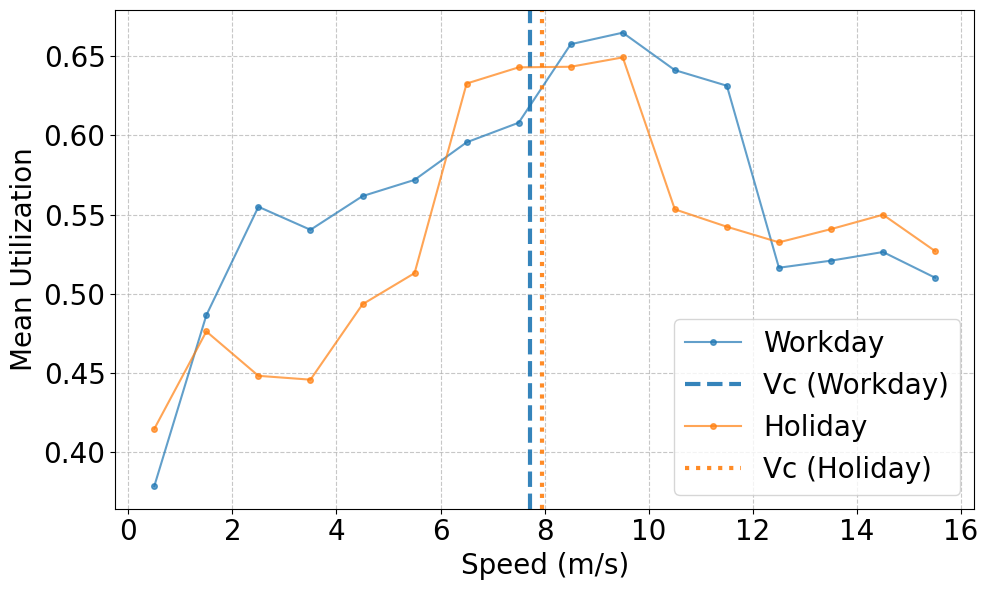

In [8]:
import numpy as np
def analyze_speed_utilization(workday_files, holiday_files, output_dir=None, font_size=12):
    """
    Analyze and plot speed vs. utilization relationships for all road levels.
    """
    # Create a single plot for both workday and holiday data
    # plt.xticks(font_size)
    # plt.yticks(font_size)
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Define colors for day types
    colors = {'workday': '#1f77b4', 'holiday': '#ff7f0e'}  # Blue for workday, Orange for holiday

    def process_file_in_chunks(file_path, chunk_size=100000):
        """Process large CSV files in chunks"""
        speed_bins = np.arange(0, 17, 1)  # Assuming max speed around 40 m/s
        utilization_sum = np.zeros(len(speed_bins) - 1)
        count = np.zeros(len(speed_bins) - 1)
        free_flow_sum = 0
        free_flow_count = 0
        
        try:
            for chunk in pd.read_csv(file_path, chunksize=chunk_size):
                # Process speed vs utilization
                for i in range(len(speed_bins) - 1):
                    mask = (chunk['avg_speed'] >= speed_bins[i]) & (chunk['avg_speed'] < speed_bins[i + 1])
                    utilization_sum[i] += chunk.loc[mask, 'utilization'].sum()
                    count[i] += mask.sum()
                
                # Process free-flow speed
                free_flow_sum += chunk['vc'].sum()
                free_flow_count += len(chunk)
                
            # Calculate means
            mean_utilization = np.divide(utilization_sum, count, where=count > 0)
            mean_free_flow = free_flow_sum / free_flow_count if free_flow_count > 0 else 0
            
            return {
                'speed_bins': speed_bins[:-1] + 0.5,  # bin centers
                'mean_utilization': mean_utilization,
                'mean_free_flow': mean_free_flow,
                'valid_bins': count > 0
            }
            
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
            return None

    # Process data for workday and holiday files
    for day_type, files in [('workday', workday_files), ('holiday', holiday_files)]:
        utilization_data = {}
        
        # Only consider levels 1 and 2 cumulatively
        for level in [1, 2]:
            if level not in files:
                print(f"Missing file for level {level} on {day_type}")
                continue
            
            file_path = files.get(level)
            if not file_path or not pd.io.common.file_exists(file_path):
                print(f"File not found for level {level} on {day_type}: {file_path}")
                continue
            
            data = process_file_in_chunks(file_path)
            if data is None:
                print(f"No data found for level {level} on {day_type}")
                continue
            
            # Get valid data points
            valid_mask = data['valid_bins']
            speed_bins = data['speed_bins'][valid_mask]
            mean_util = data['mean_utilization'][valid_mask]
            
            if level not in utilization_data:
                utilization_data[level] = {'speed_bins': speed_bins, 'mean_utilization': mean_util}
            else:
                utilization_data[level]['mean_utilization'] += mean_util
        
        # Check if both levels 1 and 2 have data
        if 1 in utilization_data and 2 in utilization_data:
            # Interpolate level 2's data to match the speed bins of level 1
            level_1_speed_bins = utilization_data[1]['speed_bins']
            level_1_utilization = utilization_data[1]['mean_utilization']
            
            level_2_speed_bins = utilization_data[2]['speed_bins']
            level_2_utilization = utilization_data[2]['mean_utilization']
            
            # Interpolate level 2 data to match level 1's speed bins
            level_2_utilization_interp = np.interp(level_1_speed_bins, level_2_speed_bins, level_2_utilization)
            
            # Combine level 1 and level 2 utilization
            combined_utilization = level_1_utilization + level_2_utilization_interp
            
            # Plot combined data for levels 1 and 2
            ax.plot(level_1_speed_bins, combined_utilization, 
                    c=colors[day_type], marker='o', markersize=4,
                    label=f'{day_type.capitalize()}', alpha=0.7)
            
            # Add free-flow speed line with the appropriate color
            linestyle = '--' if day_type == 'workday' else ':'
            ax.axvline(data['mean_free_flow'], color=colors[day_type], linestyle=linestyle, alpha=0.9, linewidth=3, label=f'Vc ({day_type.capitalize()})')
        else:
            print(f"Data missing for one or more levels (1 or 2) for {day_type.capitalize()}")

    # Configure plot with the passed font_size variable
    # ax.set_title('Speed vs. Utilization (Level 1 & 2, Workday and Holiday)', fontsize=font_size, pad=15)
    ax.set_xlabel('Speed (m/s)', fontsize=font_size)
    ax.set_ylabel('Mean Utilization', fontsize=font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    ax.legend(fontsize=font_size)
    ax.grid(True, linestyle='--', alpha=0.7)

    # Adjust layout and display
    plt.tight_layout()
    
    # Save figure if output directory is provided
    if output_dir:
        try:
            plt.savefig(f'{output_dir}/visualizations/utilization/new/speed_utilization_analysis.png', 
                       dpi=300, bbox_inches='tight', format='png')
            print(f"Plot saved to {output_dir}/visualizations/utilization/new/speed_utilization_analysis.png")
        except Exception as e:
            print(f"Error saving figure: {str(e)}")
    
    plt.show()



# Example usage:
if __name__ == "__main__":
    output_dir = 'D:/Thesis/files_output_dir/output_utilization/'  # Define the directory path
    workday_files = {
        1: output_dir + 'level1_road_history_workday_utilization_tune_AHP.csv',
        2: output_dir + 'level2_road_history_workday_utilization_tune_AHP.csv',
        3: output_dir + 'level3_road_history_workday_utilization_tune_AHP.csv'
    }
    
    holiday_files = {
        1: output_dir + 'level1_road_history_holiday_utilization_tune_AHP.csv',
        2: output_dir + 'level2_road_history_holiday_utilization_tune_AHP.csv',
        3: output_dir + 'level3_road_history_holiday_utilization_tune_AHP.csv'
    }
    
    # Send font_size parameter to the function
    font_size = 20  # Set the desired font size
    analyze_speed_utilization(workday_files, holiday_files, output_dir, font_size)


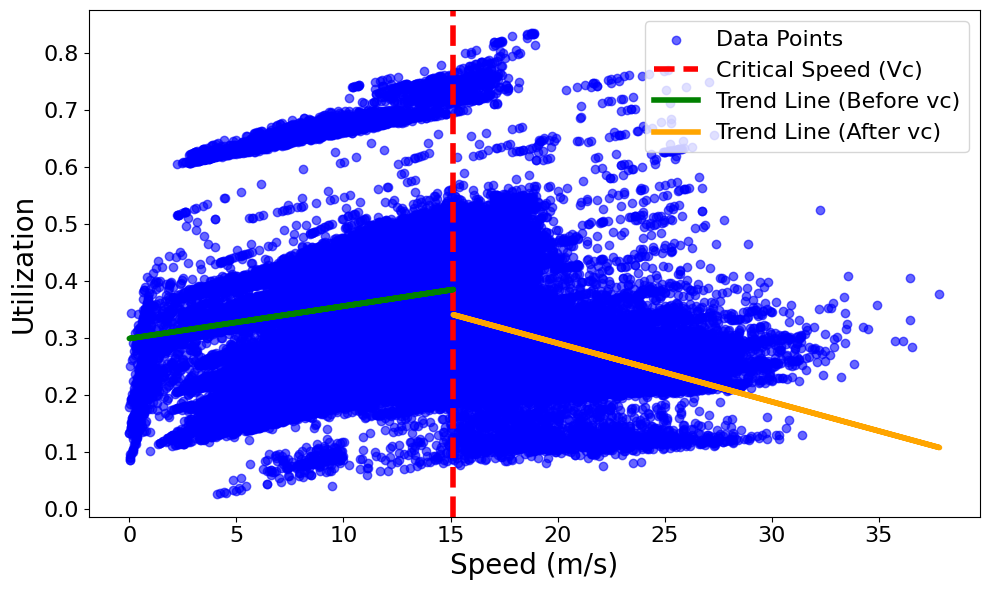

High Utilization Outliers with Speeds above Free-Flow Speed:
        avg_speed  utilization         vc
250     15.859172     0.522271  11.160739
620     15.627803     0.456498  12.965034
622     16.197287     0.462059  12.965034
623     15.855236     0.458719  12.965034
624     15.810468     0.458281  12.965034
...           ...          ...        ...
590805  15.370071     0.484475  13.693435
590806  17.335788     0.468692  13.693435
590807  16.038707     0.490657  13.693435
590808  16.875644     0.498395  13.693435
590811  16.831406     0.497986  13.693435

[4715 rows x 3 columns]
Slope of the regression line before vc: 0.0057
Slope of the regression line after vc: -0.0103


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def load_and_filter_data(file_path, time_range):
    """
    Load and filter data from a CSV file based on a specified time range.
    :param file_path: Path to the CSV file.
    :param time_range: Range of 'time' values to filter.
    :return: Filtered DataFrame.
    """
    df = pd.read_csv(file_path)
    df = df[df['time'].isin(time_range)]
    return df

def fit_piecewise_regression(df, vc_column='vc', speed_column='avg_speed', target_column='utilization'):
    """
    Perform piecewise linear regression on the data split by the free-flow speed (vc).
    :param df: DataFrame containing the data.
    :param vc_column: Column name for the free-flow speed threshold.
    :param speed_column: Column name for the speed data.
    :param target_column: Column name for the target variable (e.g., utilization).
    :return: Updated DataFrame with predicted values and regression models.
    """
    # Determine the break point (vc)
    vc = df[vc_column].mean()

    # Split data into two parts based on vc
    data_before_vc = df[df[speed_column] <= vc]
    data_after_vc = df[df[speed_column] > vc]

    # Fit linear regression for the first segment (before vc)
    model_before_vc = LinearRegression()
    model_before_vc.fit(data_before_vc[[speed_column]], data_before_vc[target_column])
    predicted_before_vc = model_before_vc.predict(data_before_vc[[speed_column]])

    # Fit linear regression for the second segment (after vc)
    model_after_vc = LinearRegression()
    model_after_vc.fit(data_after_vc[[speed_column]], data_after_vc[target_column])
    predicted_after_vc = model_after_vc.predict(data_after_vc[[speed_column]])

    # Assign predictions back to the original DataFrame
    df.loc[data_before_vc.index, 'predicted_utilization_before_vc'] = predicted_before_vc
    df.loc[data_after_vc.index, 'predicted_utilization_after_vc'] = predicted_after_vc

    return df, vc, model_before_vc, model_after_vc

def plot_results(df, vc, model_before_vc, model_after_vc, font_size):
    """
    Plot the results of the piecewise regression.
    :param df: DataFrame containing the data and predictions.
    :param vc: Free-flow speed threshold.
    :param model_before_vc: Linear regression model for data before vc.
    :param model_after_vc: Linear regression model for data after vc.
    :param font_size: Font size for the plot.
    """
    plt.figure(figsize=(10, 6))

    # Scatter plot of the data points
    plt.scatter(df['avg_speed'], df['utilization'], color='blue', alpha=0.6, label='Data Points')

    # Vertical line at vc (free-flow speed)
    plt.axvline(vc, color='red', linestyle='--',  linewidth=4, label='Critical Speed (Vc)')

    # Plot the trend line before vc
    plt.plot(df[df['avg_speed'] <= vc]['avg_speed'],
             df.loc[df['avg_speed'] <= vc, 'predicted_utilization_before_vc'],
             color='green', label='Trend Line (Before vc)', linewidth=4)

    # Plot the trend line after vc
    plt.plot(df[df['avg_speed'] > vc]['avg_speed'],
             df.loc[df['avg_speed'] > vc, 'predicted_utilization_after_vc'],
             color='orange', label='Trend Line (After vc)', linewidth=4)

    # Labels and legend
    plt.xlabel('Speed (m/s)', fontsize=font_size)
    plt.ylabel('Utilization', fontsize=font_size)
    plt.xticks(fontsize=font_size - 4)
    plt.yticks(fontsize=font_size - 4)
    plt.legend(fontsize=font_size - 4)

    # Display the plot
    
    plt.tight_layout()
    
    save_dir = "D:/Thesis/files_output_dir/output_utilization/visualizations/utilization/new"
    os.makedirs(save_dir, exist_ok=True)  # Create directory if needed
    filename = f"trend_utilization.png"
    filepath = os.path.join(save_dir, filename)
    plt.savefig(filepath, dpi=300)  # Save before showing

    plt.show()
    plt.close()

    

def identify_outliers(df, vc_column='vc', speed_column='avg_speed', target_column='utilization'):
    """
    Identify outliers with high utilization at speeds above the free-flow speed.
    :param df: DataFrame containing the data.
    :param vc_column: Column name for the free-flow speed threshold.
    :param speed_column: Column name for the speed data.
    :param target_column: Column name for the target variable (e.g., utilization).
    :return: DataFrame of outliers.
    """
    vc = df[vc_column].mean()
    outliers = df[df[speed_column] > vc]
    high_utilization_outliers = outliers[outliers[target_column] > outliers[target_column].quantile(0.9)]
    return high_utilization_outliers

def main():
    # Define parameters
    output_dir = 'D:/Thesis/files_output_dir/output_utilization/'  # Define the directory path
    workday_file = output_dir + 'level1_road_history_workday_utilization_tune_AHP.csv'
    time_range = range(90, 120)  # Time range to filter
    font_size = 20  # Font size for the plot

    # Step 1: Load and filter data
    df = load_and_filter_data(workday_file, time_range)

    # Step 2: Perform piecewise regression
    df, vc, model_before_vc, model_after_vc = fit_piecewise_regression(df)

    # Step 3: Plot results
    plot_results(df, vc, model_before_vc, model_after_vc, font_size)

    # Step 4: Identify and print outliers
    high_utilization_outliers = identify_outliers(df)
    print("High Utilization Outliers with Speeds above Free-Flow Speed:")
    print(high_utilization_outliers[['avg_speed', 'utilization', 'vc']])

    # Optional: Print the slopes of the regression lines
    print(f"Slope of the regression line before vc: {model_before_vc.coef_[0]:.4f}")
    print(f"Slope of the regression line after vc: {model_after_vc.coef_[0]:.4f}")

# Entry point of the script
if __name__ == "__main__":
    main()